In [1]:
%matplotlib inline

from HeaderP import *
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
plt.rcParams.keys()
plt.rc('font', family='serif')
params = {
   'axes.labelsize': 30,
   'axes.linewidth': 1.5,
   'legend.fontsize': 25,
   'legend.frameon': False,
   'lines.linewidth': 2,
   'xtick.direction': 'in',
   'xtick.labelsize': 25,
   'xtick.major.bottom': True,
   'xtick.major.pad': 10,
   'xtick.major.size': 10,
   'xtick.major.width': 1,
   'xtick.minor.bottom': True,
   'xtick.minor.pad': 3.5,
   'xtick.minor.size': 5,
   'xtick.minor.top': True,
   'xtick.minor.visible': True,
   'xtick.minor.width': 1,
   'xtick.top': True,
   'ytick.direction': 'in',
   'ytick.labelsize': 25,
   'ytick.major.pad': 10,
   'ytick.major.size': 10,
   'ytick.major.width': 1,
   'ytick.minor.pad': 3.5,
   'ytick.minor.size': 5,
   'ytick.minor.visible': True,
   'ytick.minor.width': 1,
   'ytick.right': True,
   'figure.figsize': [10,10], # instead of 4.5, 4.5
   'savefig.format': 'eps',
   }
plt.rcParams.update(params)


    

/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module 

In [6]:
APOGEE_age=readfits('apogee_astroNN-DR16-v1.fits')

In [10]:
cannonage=pd.read_pickle('CannonDR16_cut.pkl')

In [18]:
cmage=pd.merge(APOGEE_age[['age','APOGEE_ID']],cannonage,left_on='APOGEE_ID',right_on='APOGEE_ID',how='inner')

(0, 15)

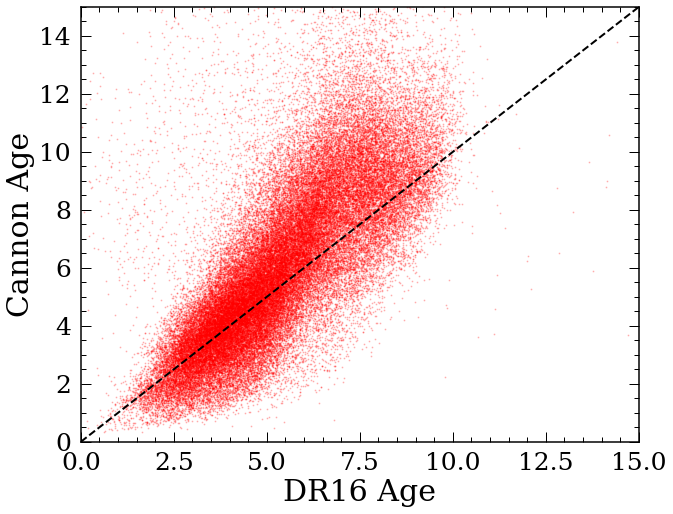

In [55]:
plt.figure(figsize=(10,8))
plt.scatter(cmage['age'],10**cmage['LogAge']/1000,c='r',s=1,alpha=0.2)
plt.xlabel('DR16 Age')
plt.ylabel('Cannon Age')
plt.plot([0,15],[0,15],'k--')
plt.xlim([0,15])
plt.ylim([0,15])

(0, 17)

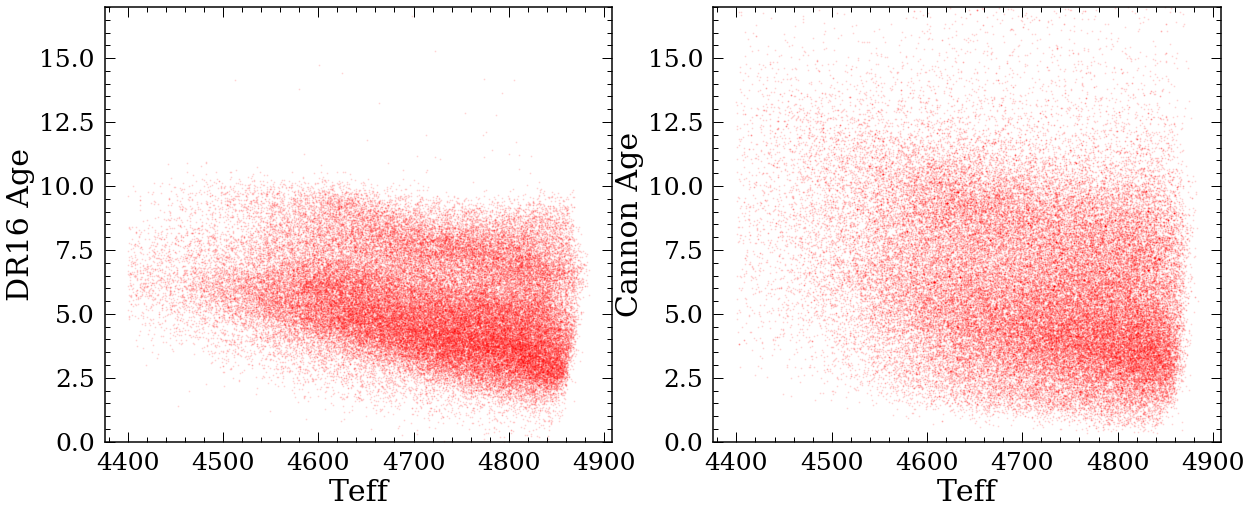

In [40]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(cmage['TEFF'],cmage['age'],c='r',s=1,alpha=0.1)
plt.xlabel('Teff')
plt.ylabel('DR16 Age')
plt.ylim([0,17])
plt.subplot(1,2,2)
plt.scatter(cmage['TEFF'],cmage['Age'],c='r',s=1,alpha=0.1)
plt.xlabel('Teff')
plt.ylabel('Cannon Age')
plt.ylim([0,17])

In [43]:
cmage['abs_G']=m_to_M(cmage['GAIA_PHOT_G_MEAN_MAG'],1/cmage['GAIA_PARALLAX'])

/Users/lucy/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


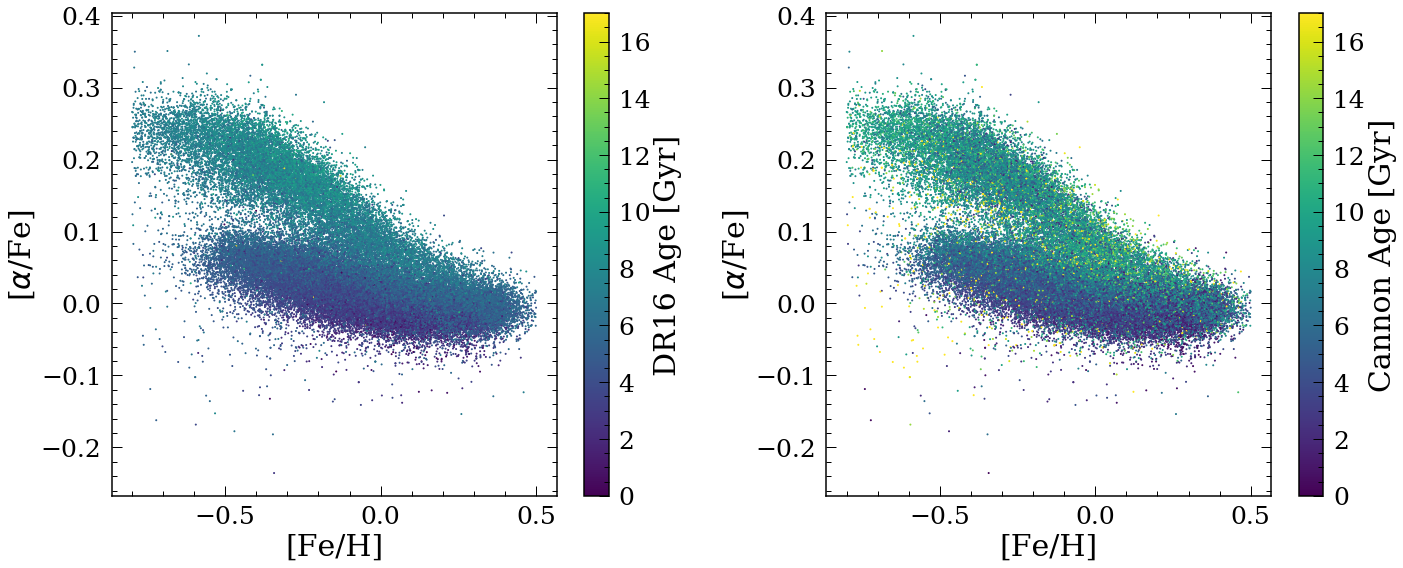

In [51]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(cmage['M_H'],cmage['ALPHA_M'],c=cmage['age'],s=1,vmin=0,vmax=17)
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')
cb=plt.colorbar()
cb.set_label('DR16 Age [Gyr]')

plt.subplot(1,2,2)
plt.scatter(cmage['M_H'],cmage['ALPHA_M'],c=cmage['Age'],s=1,vmin=0,vmax=17)
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')
cb=plt.colorbar()
cb.set_label('Cannon Age [Gyr]')
plt.tight_layout()

Text(0.5, 1.0, 'Age distrubution of 69144 giant stars in APOGEE DR16')

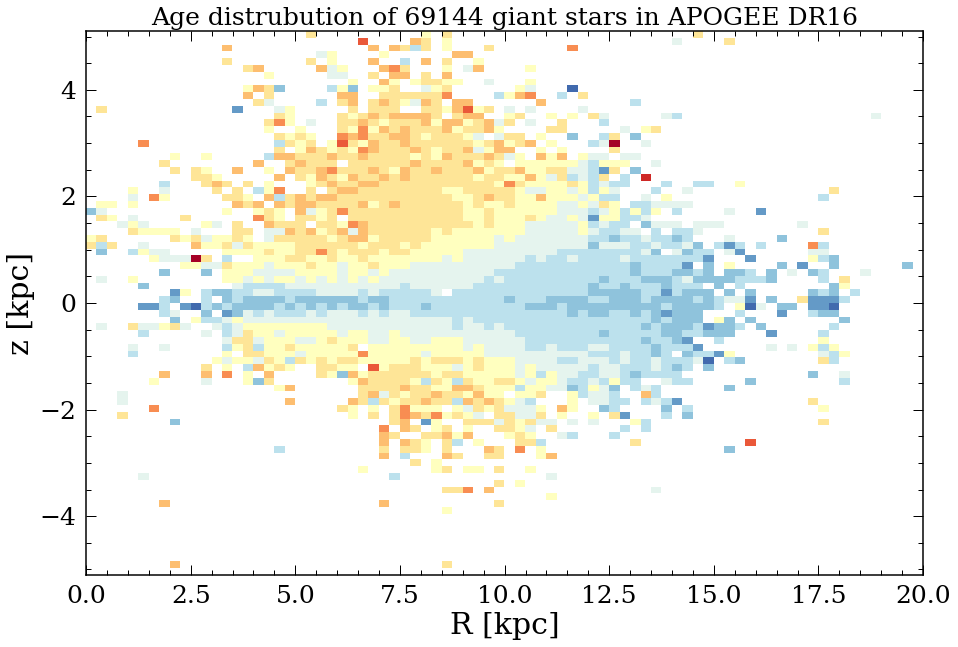

In [28]:

x1,x2,y1,y2 = 0,20,-5.1,5.1
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 80

cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
cmap1.set_bad('white',1.)


plt.figure(figsize=(15,10))

image=makeagemap_each(cmage['R'].values,cmage['z'].values,
                cmage['age'].values,lims, binnum)
plt.imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
           extent = (x1,x2, y1,y2),cmap=cmap1, vmin=0,vmax=13)

plt.xlabel('R [kpc]')
plt.ylabel('z [kpc]')
plt.title('Age distrubution of %d giant stars in APOGEE DR16'%len(cmage),fontsize=25)


100%|██████████| 9/9 [00:00<00:00, 55.18it/s]


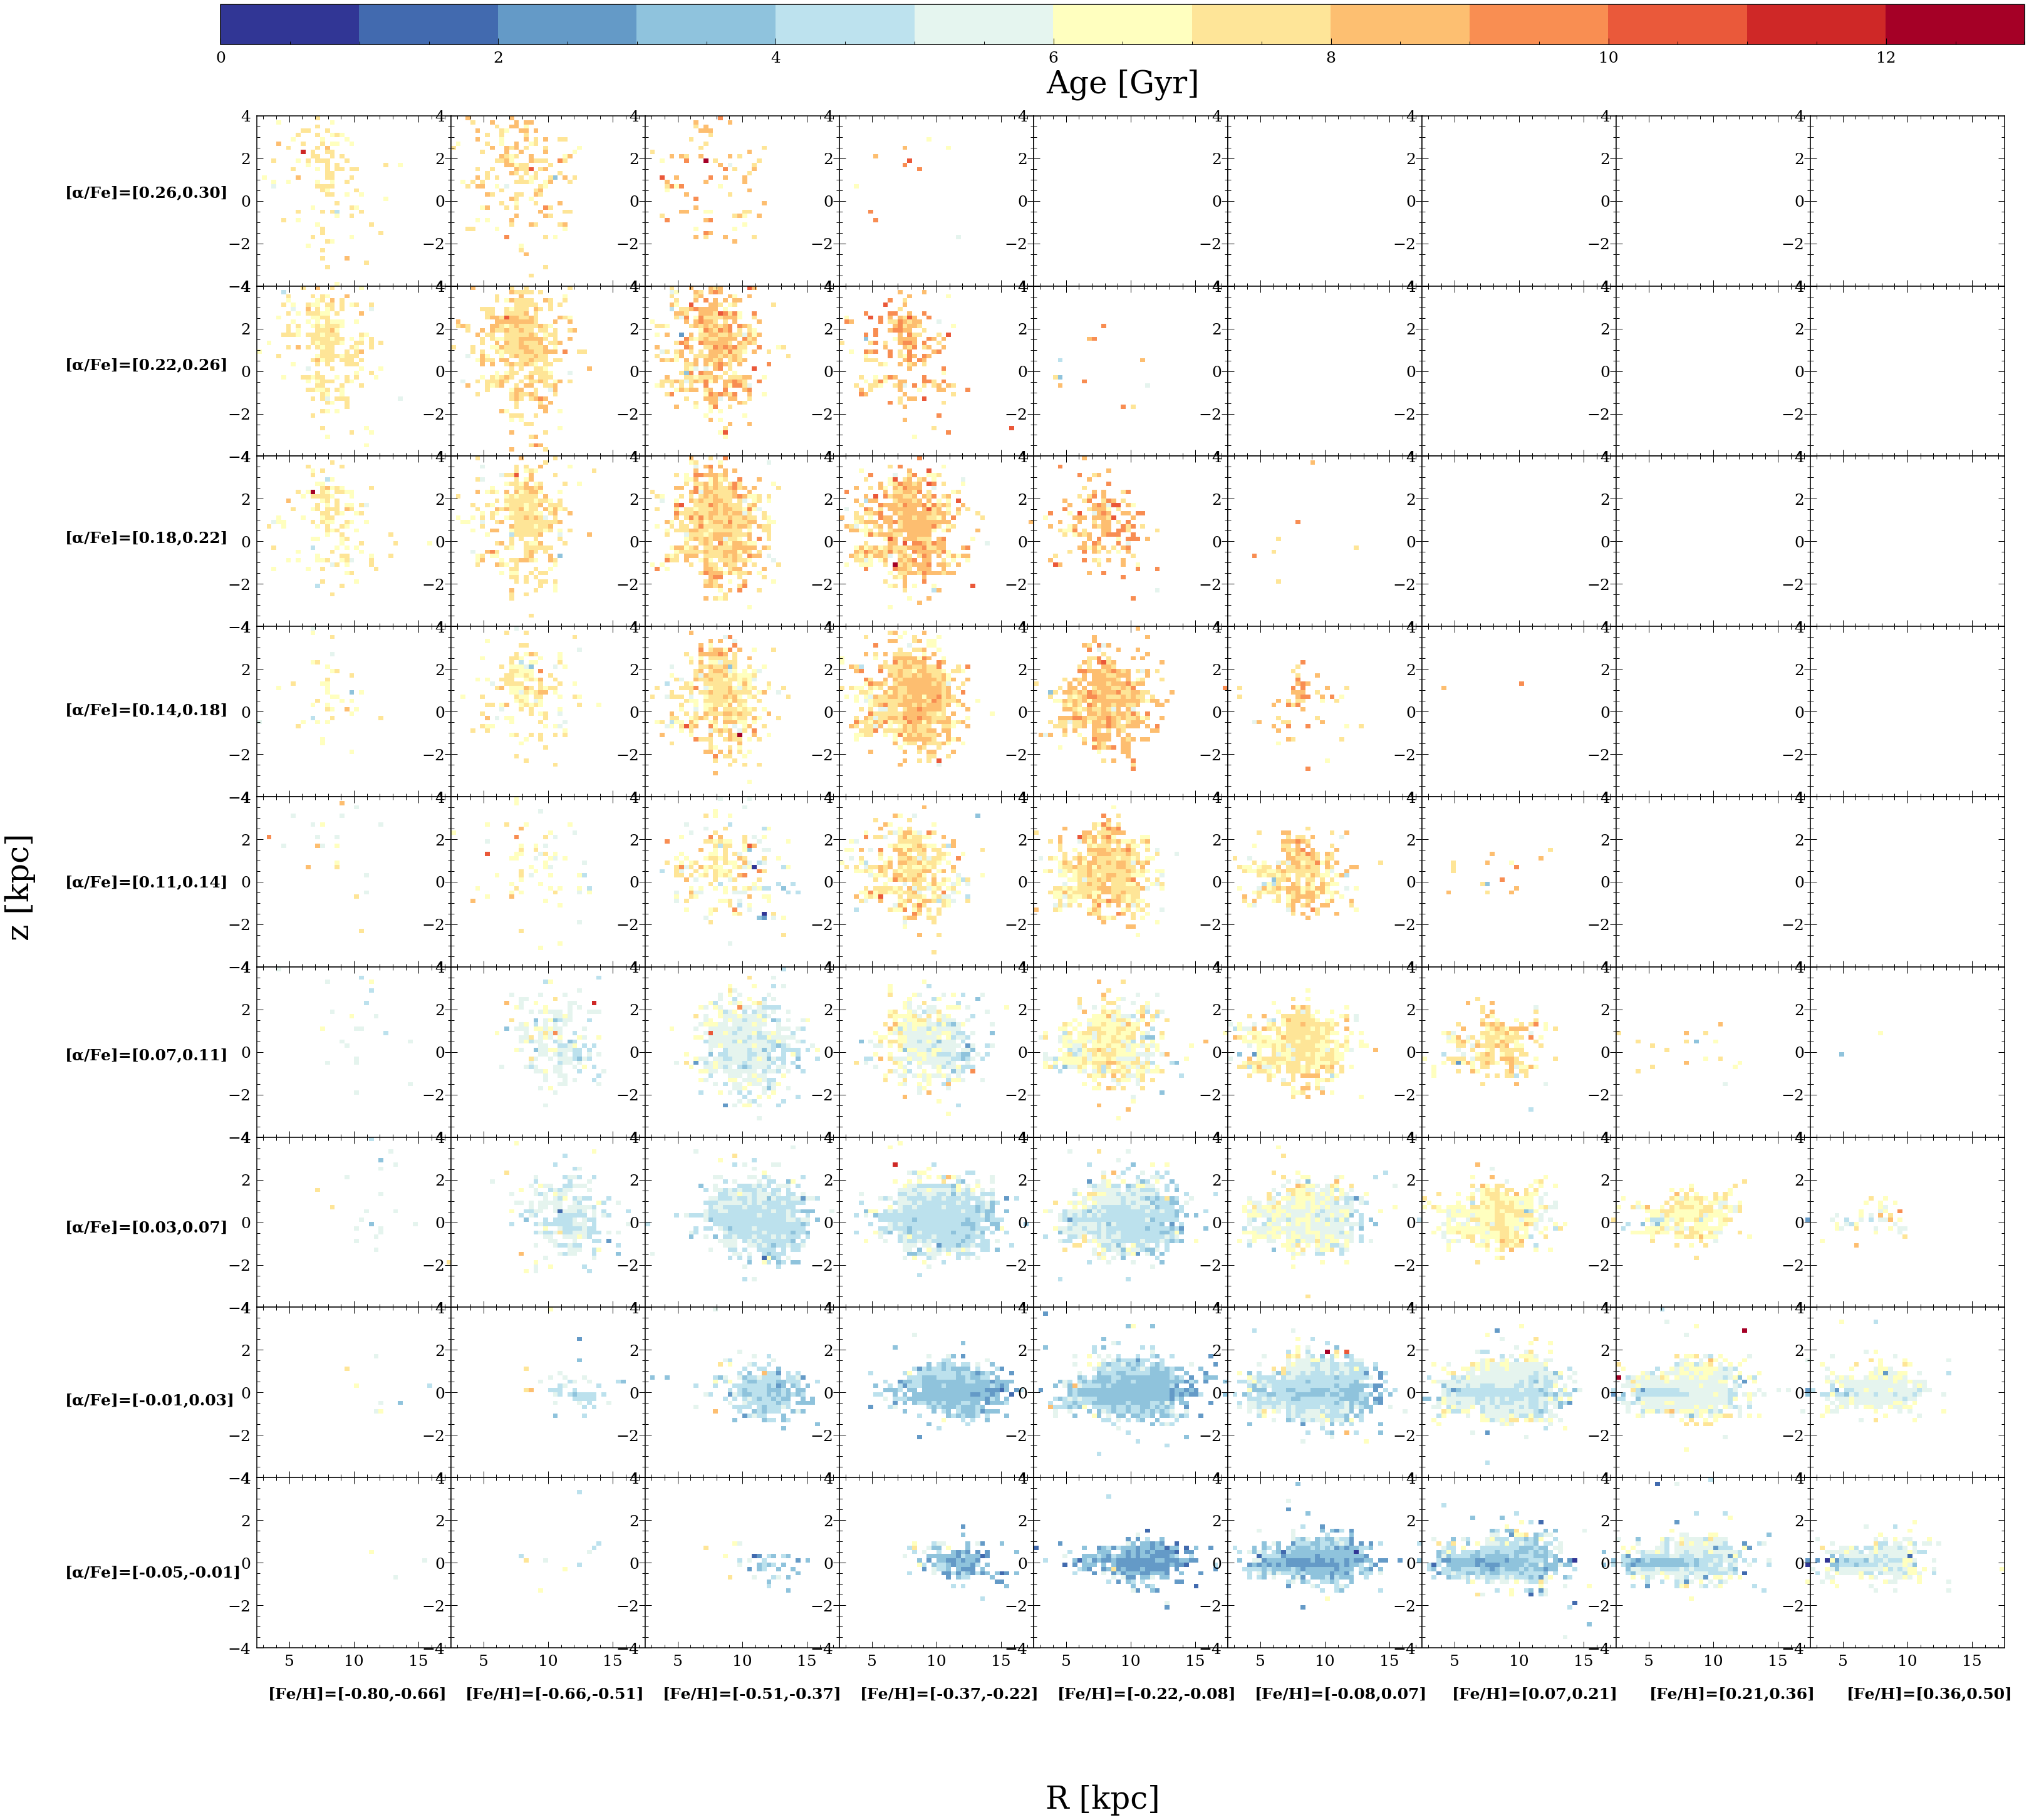

In [30]:
from scipy.ndimage import gaussian_filter

#Febin=np.linspace(-0.8,0.5,10)
#alpha=np.linspace(0.3,-0.05,10)
Febin=np.linspace(-0.8,0.5,10)
alpha=np.linspace(0.3,-0.05,10)

#plt.figure(figsize=(len(Febin)*10-10,len(alpha)*10-10))

x1,x2,y1,y2 = 2.5,17.5,-4,4
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40

#df_CM=df_CM.loc[df_CM['Age_err']<5]
print(len(cmage))

fig, axarr = plt.subplots(len(alpha)-1,len(Febin)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(len(Febin)*5,len(alpha)*5-5))
count=0

for i in range(len(alpha)-1):
    print(i/(len(alpha)-1))
    clear_output(wait = True)
    
    df_all=cmage.loc[cmage['ALPHA_M']>alpha[i+1]]
    df_all=df_all.loc[df_all['ALPHA_M']<alpha[i]]
    #print(len(df_all))
    
    for j in trange(len(Febin)-1):
        df_all_z=df_all.loc[(df_all['M_H'])>Febin[j]]
        df_all_z=df_all_z.loc[(df_all_z['M_H'])<Febin[j+1]]
        
        #print(len(df_all_z))
        image=makeagemap_each(df_all_z['R'].values,df_all_z['z'].values,
                df_all_z['age'].values,lims, binnum)
        
        
        cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
        cmap1.set_bad('white',1.)
    
        x1m,x2m,y1m,y2m = lims[0], lims[1], lims[2], lims[3]
        
        im=axarr[i,j].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
                   extent = (x1m,x2m, y1m,y2m),cmap=cmap1, vmin=0,vmax=13)
 
        count=count+1
    
        #plt.subplots_adjust(bottom=0.20)
        #plt.xlabel("R [kpc]",fontsize = 20,labelpad =5)
        #plt.ylabel("z [kpc]" ,fontsize = 20)
    
        #cb=plt.colorbar(orientation = 'horizontal', shrink=.75)
        #fs = 20
        #cb.set_label('Age [Gyr]',fontsize = fs,labelpad = 5)
        #fs = 30 
        
        plt.xlim(x1m,x2m)
        plt.ylim(y1m,y2m)

        #count=count+1
        #plt.title('%.2f<[Fe/H]<%.2f,%.2f<[$\\alpha$/Fe]<%.2f'%(Febin[j],Febin[j+1],alpha[i+1],alpha[i]),fontsize=25)
        #plt.tight_layout()
cb_ax = fig.add_axes([0.109, 0.915, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
car = cbar.set_label('Age [Gyr]',fontsize = 50,labelpad = 5)


fig.text(0.02, 0.5, 'z [kpc]', ha='center', va='center', rotation='vertical',fontsize=50)
fig.text(0.5, 0.05, 'R [kpc]', ha='center', va='center', rotation='horizontal',fontsize=50)

for i in range(10-1):
    fig.text(0.04, 0.16+0.085*i, '[α/Fe]=[%.2f,%.2f]'%(0.3-alpha[i]-0.05,0.3-alpha[i+1]-0.05), rotation='horizontal',
             fontsize=25, fontweight='bold')
    fig.text(0.13+0.0875*i, 0.1, '[Fe/H]=[%.2f,%.2f]'%(Febin[i],Febin[i+1]), rotation='horizontal',
             fontsize=25, fontweight='bold')
        



